# 三、如何编码？

---

## 1 极化码的编码策略

**基本思想**：将不可靠信道进行冻结（Frozen），仅在可靠信道上传输信息（Info）。 

> 这只是形象化描述，请勿望文生义。所谓“信道”有复杂的数学表达式，所谓“冻结”也并非废弃，而是使用已知信息进行填充。

**冻结集**：假设我们现在已经明确了想要的极化码的码长$N=2^n$、码率$R$，并且经过之前的构造阶段，我们获取到了一个非常关键的信息：各极化信道的可靠度$\mathcal{H}_0,\ldots,\mathcal{H}_{N-1}$。那么，定义冻结集$\mathcal{F}$是满足如下三个条件的集合：
- $\mathcal{F} \subset \{0, \ldots, N-1\}$
- $\lvert \mathcal{F} \rvert = \lceil N(1 - R) \rceil$
- $\forall i \in \mathcal{F}, j \not\in \mathcal{F}, \mathcal{H}_i \leqslant \mathcal{H}_j$

简单来说，冻结集$\mathcal{F}$，就是前$N(1 - R)$个最不可靠的信道所对应的索引$i \in \{0, \ldots, N-1\}$。在接下来的编码过程中，将不会在这些信道上传输未知消息。

---

## 2 生成矩阵法

极化码是一种线性码，准确来说，是一种“陪集码”，可以使用生成矩阵进行编码。步骤如下：

1. 构造一个序列$u_0,\ldots,u_{N-1}$，其中：
    - 对冻结集部分置$0$，也即强制令$\forall i \in \mathcal{F}: u_i=0$；
    - 在其余位置上依次填充想要传输的信息比特；
2. 执行矩阵运算得到编码序列$\vec{x}=\vec{u}\cdot \mathbf{G}_N$，其中：
    - $\mathbf{G}_N=\mathbf{G}_2^{\otimes n}$，符号$\otimes n$表示进行$n$次Kronecker积；
    - $\mathbf{G}_2=\begin{pmatrix} 1 & 0 \\ 1 & 1 \end{pmatrix}$.

注意上述运算都应当模2！

---

## 3 递归运算法

根据生成矩阵$\mathbf{G}_N$的定义不难知道，其中$1$的数量为$3^n$，而总元素数量为$4^n$，随着码长增加矩阵密度趋于$0$。因此除了执行复杂度为$\mathcal{O}(N^2)$的矩阵运算之外，应该还存在一种复杂度更低的编码方案，这就是这一小节要介绍的递归运算法。

> 事实上，递归运算才是极化码真正的编码算法，生成矩阵$\mathbf{G}_N$实际上只是递归运算的一种便于描述的等价表示。

### 3.1 码长为2的极化码

先考虑码长为$N=2$的情况，我们希望输入信道的随机变量$x_1,x_2$，是由另外两个随机变量$u_1,u_2$经过下图所示的计算过程得到的：  
![码长为2的极化码](./figures/len2.png)  
在上图中，显然有$(x_1,x_2) = (u_1,u_2) \cdot \mathbf{G}_2$。

### 3.2 码长为4的极化码

接下来，我们把这个过程拓展到$N=4$，继续应用之前的做法，对$x_1,x_2$和$x_3,x_4$这两对随机变量，我们希望它们是由另外两对随机变量$v_1,v_2$和$v_3,v_4$经过同样的计算过程得到的，如下图所示：  
![码长为4的极化码-极化1层](./figures/len4_01.png)  
但如果只做一层构造，我们实际上仍然在使用码长为$2$的极化码，这将是非常平凡的拓展。但是我们可以注意到，在第一层构造中，$v_1$和$v_3$地位相同，$v_2$和$v_4$地位相同，所以进一步构造中，可以把它们划分到同一组，然后对这两组再进行一层构造：  
![码长为4的极化码-极化2层](./figures/len4_02.png)  
其中$v_1,v_3$是由另一对随机变量$u_1,u_2$经过$\mathbf{G}_2$计算得到，而$v_2,v_4$是由$u_3,u_4$得到。

### 3.3 码长为$2^n$的极化码与洗牌置换（Shuffle Permutation）

在从$N=2$拓展到$N=4$的过程中，出现了一种分组方式，稍加分析不难发现这是一种类似于扑克牌洗牌的顺序，即将$\{1,2,\ldots,N\}$对应到$\{1, N/2+1, 2, N/2+2, \ldots, N/2, N\}$。如果将其记作$R_N$，那么我们就得到了任意$N=2^n$的构造过程：  
![码长为N的极化码](./figures/lenN.png)  
不难发现这个递归结构共有$\log{N}$层，每一层计算复杂度为$\mathcal{O}(N)$，因此总计算复杂度为$\mathcal{O}(N\log{N})$

---

## 4 比特翻转置换

如果你真正动手实现了递归编码算法，那么会发现，对于输入的序列$u_{1:N}$，编码结果$x_{1:N} \neq u_{1:N} \cdot \mathbf{G}_N$。这是因为，递归编码和生成矩阵编码之间，相差了一个在蝶形变换计算结构（如离散傅里叶变换）中经常出现的置换顺序，被称为比特翻转置换（Bit-Reversal Permutation）。

**比特翻转置换**：将一个给定的索引$i\in\{0,1,\ldots,2^n-1\}$，表示为$n$位比特形式，然后将这$n$位比特进行首尾颠倒，从而得到新的索引。

举例：码长为$2^4=16$，索引$i=7=(0111)_2$，将其首尾颠倒得到$i'=(1110)_2=14$。

代码示例：

In [1]:
import plcoding
import numpy as np
from matplotlib import pyplot as plt
# 设定码长为N=2^n
n = 5; N = (1 << n)
# 随机生成一个序列
u = np.random.choice(a=2, p=(0.5, 0.5), size=(N,))

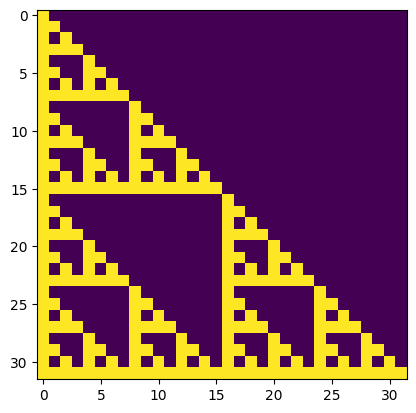

In [2]:
# 使用生成矩阵法进行编码
GN = plcoding.kron_power(np.array([[1, 0], [1, 1]]), n)
x1 = np.mod(np.matmul(u, GN), 2)
# 简单展示一下极化码的生成矩阵，非常漂亮
plt.imshow(GN)
plt.show()

In [3]:
# 使用递归计算法
x2 = np.copy(u)
tmp = np.empty_like(u)
# 从左向右计算，层数增加，分组大小减半
W_size = N
while W_size > 1:
    # 两两进行极化变换
    for i in range(0, N, 2):
        tmp[i] = (x2[i] + x2[i + 1]) % 2
        tmp[i + 1] = x2[i + 1]
    # 组内执行洗牌置换
    for offset in range(0, N, W_size):
        for i in range(int(W_size / 2)):
            x2[offset + i] = tmp[offset + 2 * i]
            x2[offset + int(W_size / 2) + i] = tmp[offset + 2 * i + 1]
    W_size = int(W_size / 2)

In [4]:
# 直接对比它们是不同的
(x1 == x2).all()

False

In [5]:
# 需要经过比特翻转排序，才会得到相同的结果
perm = plcoding.bitrev_perm(N)
(x1[perm] == x2).all()

True